# 로지스틱 회귀
- 종속 변수가 범주형인 경우 적용하는 회귀 분석 방식
- 종속 변수 Y를 직접 모델링하지 않고 Y가 특정 범주에 속하는 확률을 모델링

- 매개변수
    - penalty
        - 기본값 : 'l2'
        - 규제 방식을 선택
            - l1 : Lasso
            - l2 : Ridge
            - elasticnet : l1 + l2 혼합
            - none : 규제 없음
    - dual
        - 기본값 : False
        - solver 매개변수의 값이 'liblinear'인 경우 사용
        - 쌍대 문제를 생성하여 해답을 내는 과정을 사용할 것인가?
        -데이터의 갯수가 적은 경우
    
    - C
        - 기본값 : 1.0
        - 규제 강도의 역수
            - 작을 수록 -> 규제 강도 up (과적합 방지)
            - 클수록 -> 규제 강도 down (유연)
    
    - class_weight
        - 기본값 : None
        - 클래스의 불균형을 처리
            - 'balanced' : 클래스의 빈도에 반비례하게 가중치를 부여
            - dict형 데이터 -> {클래스명 : 가중치, ..} -> 특정 클래스에 가중치를 선택하여 지정
    
    - solver
        - 기본값 : lbfgs
        - 최적의 알고리즘을 선택 (데이터의 크기 / 규제)
            - libliner : 적은 데이터, L1 / L2 지원
            - lbfgs : 다중 클래스를 지원, 빠르고 안정적, L2 / None 지원
            - saga : 대규모 데이터, L1 / L2 / ElasticNet 지원
            - newton-cg, sag : 대규모 데이터, L2 / None 지원
        
    - multi_class
        - 기본값: auto
        - 다중 클래스 처리 방식 지정
            - ovr(One - vs - Rest) : 2진분류를 반복 작업
            - multinomial : (Softmax, solver 제한)
            - auto: solver와 데이터의 크기를 기반으로 자동 설정 
    
    - l1_ratio
        - 기본값: None
        - 규제 방식이 ElasticNet인 경우 L1 패널티의 비중

- 속성(fit()함수를 이용하여 학습을 한 뒤 생성이 되는 데이터)
    - coef_
        - 회귀계수 출력
    -  intercept_
        -  절편의 값
    - classes_
        - 학습된 클래스
    
- 매서드(class 안의 함수들)
    - fit(x, y)
        - 모델의 학습
    - predict(x)
        - 클래스를 예측
    - predict_proba(x)
        - 클래스 별 확률
    - predict_log_proba(x)
        - 클래스 별 로그 확률
    - decision_function(x)
        - 클래스 별 점수
    - score(x, y)
        - 정확도
    - get_params()
        - 모델 생성시 하이퍼파라미터의 인자값

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# 분류 모델의 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
body = pd.read_csv("../data_git/data/bodyPerformance.csv")

In [5]:
# gender 컬럼 데이터의 유일한 값 출력
body['gender'].unique()

array(['M', 'F'], dtype=object)

In [6]:
# 빈도수를 확인
body['gender'].value_counts()

gender
M    8467
F    4926
Name: count, dtype: int64

In [7]:
# gender 컬럼의 데이터를 M은 0으로 F는 1로 변환
# 방법 1
body['gender'].map(
    {
        "M" : 0,
        "F" : 1
    }
).value_counts()


gender
0    8467
1    4926
Name: count, dtype: int64

In [8]:
# 방법 2
body['gender'].map(
    lambda x : 0 if x == 'M' else 1
).value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [9]:
# 방법 3
body['gender'].replace('M', 0).replace('F', 1)

0        0
1        0
2        0
3        0
4        0
        ..
13388    0
13389    0
13390    0
13391    1
13392    0
Name: gender, Length: 13393, dtype: int64

In [10]:
# 방법 4
body['gender'] = np.where(
    body['gender'] == 'M', 0, 1
)

In [11]:
# class 컬럼의 데이터를 이진 분류
# A는 1 나머지는 0으로
body['class_1'] = np.where(
    body['class'] == 'A', 1, 0
)

In [12]:
body['class_1']

0        0
1        1
2        0
3        0
4        0
        ..
13388    0
13389    0
13390    1
13391    0
13392    0
Name: class_1, Length: 13393, dtype: int64

In [13]:
# 독립변수, 종속변수 나눠주기
x = body.drop(['class', 'class_1'], axis = 1).values
y = body['class_1']

In [14]:
# train, test 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, random_state= 42
)

In [15]:
print(X_train.shape, X_test.shape)

(9375, 11) (4018, 11)


In [16]:
# 로지스틱 회귀 모델을 생성
logR = LogisticRegression(class_weight='balanced')

In [17]:
# 모델의 학습
logR.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
# 확률 추정 그래프 시각화
proba = pd.DataFrame(logR.predict_proba(X_train))

In [19]:
proba

,0,1
0,0.132214,0.867786
1,0.012137,0.987863
2,0.975604,0.024396
3,0.897567,0.102433
4,0.881407,0.118593
...,...,...
9370,0.643060,0.356940
9371,0.987174,0.012826
9372,0.169759,0.830241
9373,0.970238,0.029762


In [20]:
# 클래스의 점수(분류에 대한 확신의 점수)
cs = pd.DataFrame(logR.decision_function(X_train))

In [21]:
df = pd.concat([proba, cs], axis = 1)
# 컬럼의 이름을 변경
df.columns = ['Not A', 'A', 'decision_function']
df.sort_values('decision_function', inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Not A,A,decision_function
0,1.000000,1.701988e-08,-17.888884
1,1.000000,2.428843e-08,-17.533266
2,1.000000,9.742376e-08,-16.144196
3,1.000000,1.902956e-07,-15.474687
4,1.000000,1.980365e-07,-15.434814
...,...,...,...
9370,0.000405,9.995947e-01,7.810419
9371,0.000376,9.996236e-01,7.884575
9372,0.000349,9.996505e-01,7.958765
9373,0.000120,9.998803e-01,9.030517


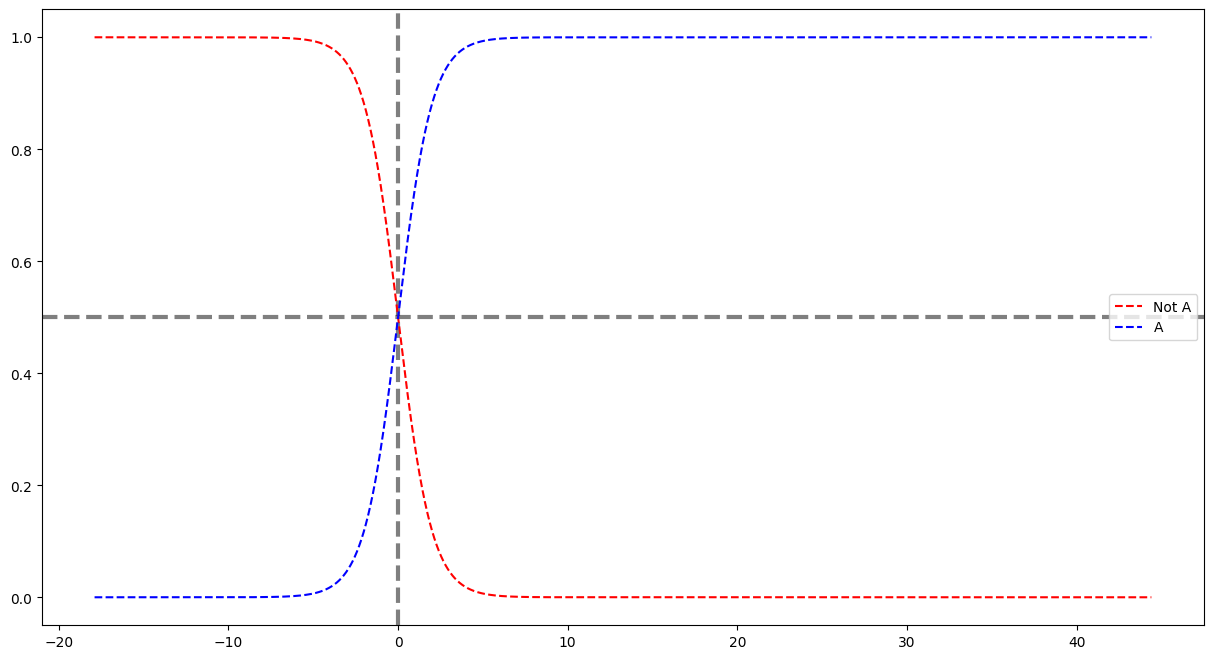

In [22]:
# 그래프 시각화
plt.figure(figsize = (15, 8))

# 보조선
plt.axhline(y = 0.5, linestyle = '--', color = 'black', linewidth = 3, alpha = 0.5)
plt.axvline(x = 0, linestyle = '--', color = 'black', linewidth = 3, alpha = 0.5)
plt.plot(df['decision_function'], df['Not A'], 'r--', label = 'Not A')
plt.plot(df['decision_function'], df['A'], 'b--', label = 'A')
plt.legend()
plt.show()

- 분류분석의 평가 지표

- 정확도
    - 실제 데이터와 예측 데이터가 얼마나 같은지 판단하는 지표
    - TN + TP / TN + TP + FP + FN
- 혼동행렬
    - 이진 분류의 예측 오류가 얼마인지, 어떠한 유형의 오류가 발생하는지를 나타내는 지표
        - TN : 예측 값이 Negative(0), 실제 값이 Negative(0)
        - FP : 예측 값이 Positive(1), 실제 값이 Negative(0)
        - FN : 예측 값이 Negative(0), 실제 값이 Positive(1)
        - TP : 예측 값이 Positive(1), 실제 값이 Positive(1)
- 정밀도
    - Positive로 예측한 것들 중 실제 값이 Positive인 것들의 비율
    - 양성 예측도라 부른다.
    - 해당 데이터가 중요성을 가지는 경우는 실제 Negative인 데이터를 Postitive로 잘못 예측하여 업무상 큰 문제가 발생하는 경우
    - TP / (TP + FP)
- 재현율
    - 실제 Positive인 것들 중 예측이 Positive인 것들의 비율
    - TP / (TP + FN)
- F1_score
    - 정밀도와 재현율을 결합한 분류 성능 지표
    - 정밀도와 재현율이 어느 한쪽으로 치우치지 않고 적절하게 조화를 이루었을 때 높은 수치를 나타냄
    - 2 * 정밀도 * 재현율 / (정밀도 + 재현율)
    - 2 * TP / 2 * TP + FP + FN

In [23]:
# 분석 모델의 예측

pred = logR.predict(X_test)

In [24]:
# 혼동행렬
cm = confusion_matrix(Y_test, pred)
# 정확도
acc = accuracy_score(Y_test, pred)
# 정밀도
prc = precision_score(Y_test, pred)
# 재현율
rcll = recall_score(Y_test, pred)
# f1score
f1 = f1_score(Y_test, pred)

In [25]:
print("혼동행렬 : ", cm)
print("정확도: ", round(acc, 2))
print("정밀도 : ", round(prc, 2))
print("재현율 : ", round(rcll, 2))
print("F1스코어 : ", round(f1, 2))

혼동행렬 :  [[2459  519]
 [ 163  877]]
정확도:  0.83
정밀도 :  0.63
재현율 :  0.84
F1스코어 :  0.72


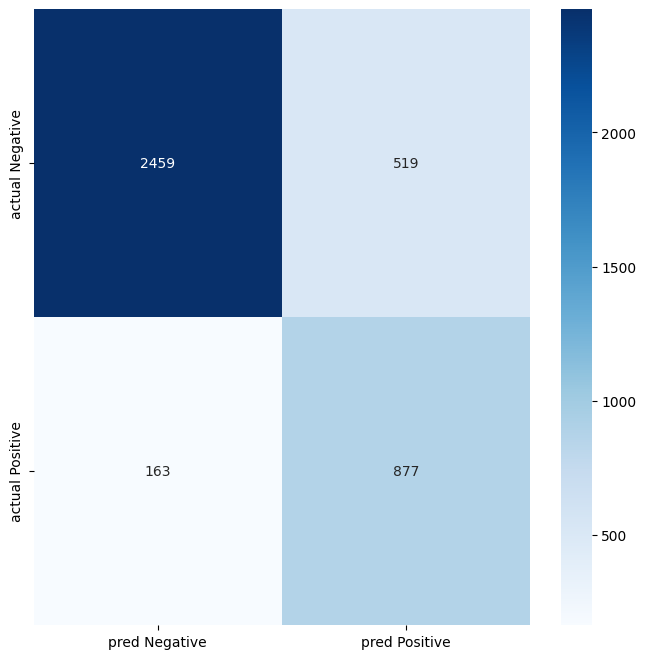

In [26]:
# 혼동행렬을 히트맵으로 시각화
plt.figure(figsize = (8, 8))

sns.heatmap(
    cm, annot = True, cmap = 'Blues', fmt = 'd',
    xticklabels = ['pred Negative', 'pred Positive'],
    yticklabels = ['actual Negative', 'actual Positive']
)

plt.show()

In [27]:
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [43]:
np.where(body['class'] == 'A',
         0,
         np.where(body['class'] == 'B',
                1,
                np.where(body['class'] == "C", 2 ,3)
                )
)

array([2, 0, 2, ..., 0, 3, 2], shape=(13393,))

In [38]:
body['class_2'] = body['class'].map(
    {
        "A" : 0,
        "B" : 1,
        "C" : 2,
        "D" : 3,
    }
)

In [45]:
body['class_2'].value_counts()

class_2
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64

In [46]:
# 독립 변수, 종속 변수 데이터 생성
x = body.drop(['class', 'class_1', 'class_2'], axis = 1).values
y = body['class_2'].values

In [47]:
# 데이터셋 분할
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, 
    test_size = 0.3, 
    random_state=42, 
    stratify = y
                 )

In [50]:
pd.Series(Y_train).value_counts()

2    2344
3    2344
0    2344
1    2343
Name: count, dtype: int64

In [51]:
# 로지스틱회귀 모델을 생성
# multi_class : 다중 클래스 -> ovr(이진분류 반복적), multinomial(다중 클래스 계산)
softm = LogisticRegression(multi_class='multinomial', C = 10)

In [52]:
# 데이터 학습
softm.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [53]:
# 예측
pred = softm.predict(X_test)

In [54]:
pred

array([2, 1, 1, ..., 0, 0, 0], shape=(4018,))

In [55]:
# 성능 평가 -> sklearn.metrics -> 함수들은 공통적으로 2개의 인자(실제 데이터, 예측 데이터)
multi_cm = confusion_matrix(Y_test, pred)
multi_cm

array([[737, 239,  28,   0],
       [263, 410, 289,  42],
       [116, 192, 500, 197],
       [ 24,  47, 167, 767]])

In [56]:
multi_acc = accuracy_score(Y_test, pred)

In [57]:
multi_acc

0.6007964161274266

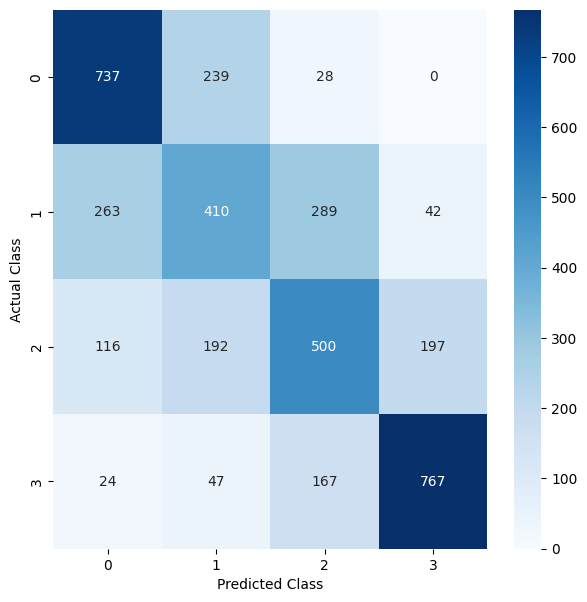

In [60]:
# 혼동행렬 시각화
plt.figure(figsize=(7, 7))
sns.heatmap(
    multi_cm,
    annot = True,
    fmt = 'd',
    cmap = 'Blues',
    xticklabels=[0, 1, 2, 3],
    yticklabels=[0, 1, 2, 3],
)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [61]:
logR2 = LogisticRegression(multi_class = 'ovr', C=10)
logR2.fit(X_train, Y_train)
pred2 = logR2.predict(X_test)
acc2 = accuracy_score(Y_test, pred2)
print(round(acc2, 2))

0.59
